Q 02 = Multiple Linear Regression Toyota Corolla

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DS Data Sets/Multi Linear Regression/ToyotaCorolla.csv', encoding='latin1')


In [4]:
df

,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,0,0,0,1,0,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,0,1,0,0,0,1,0,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,...,1,1,0,1,1,1,0,0,0,0
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,...,0,1,0,0,1,1,0,0,0,0
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,...,0,1,0,0,0,1,0,0,0,0
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.head()

,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,0,0,0,1,0,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,0,1,0,0,0,1,0,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,0,1,0,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   model              1436 non-null   object
 1   price              1436 non-null   int64 
 2   age_08_04          1436 non-null   int64 
 3   mfg_month          1436 non-null   int64 
 4   mfg_year           1436 non-null   int64 
 5   km                 1436 non-null   int64 
 6   fuel_type          1436 non-null   object
 7   hp                 1436 non-null   int64 
 8   met_color          1436 non-null   int64 
 9   color              1436 non-null   object
 10  automatic          1436 non-null   int64 
 11  cc                 1436 non-null   int64 
 12  doors              1436 non-null   int64 
 13  cylinders          1436 non-null   int64 
 14  gears              1436 non-null   int64 
 15  quarterly_tax      1436 non-null   int64 
 16  weight             1436 non-null   int64 


In [ ]:
df.describe()

,price,age_08_04,mfg_month,mfg_year,km,hp,met_color,automatic,cc,doors,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,...,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.002786,0.277855
std,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,...,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.052723,0.448098
min,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# EDA

In [6]:
import pandas as pd

In [7]:
df.columns

Index(['model', 'price', 'age_08_04', 'mfg_month', 'mfg_year', 'km',
       'fuel_type', 'hp', 'met_color', 'color', 'automatic', 'cc', 'doors',
       'cylinders', 'gears', 'quarterly_tax', 'weight', 'mfr_guarantee',
       'bovag_guarantee', 'guarantee_period', 'abs', 'airbag_1', 'airbag_2',
       'airco', 'automatic_airco', 'boardcomputer', 'cd_player',
       'central_lock', 'powered_windows', 'power_steering', 'radio',
       'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim',
       'radio_cassette', 'parking_assistant', 'tow_bar'],
      dtype='object')

In [9]:
df2=df[['price','age_08_04','km','hp','cc','doors','gears','quarterly_tax','weight']]

In [10]:
df2.shape

(1436, 9)

In [11]:
df2.dtypes

price            int64
age_08_04        int64
km               int64
hp               int64
cc               int64
doors            int64
gears            int64
quarterly_tax    int64
weight           int64
dtype: object

In [12]:
df2.isnull().sum()

price            0
age_08_04        0
km               0
hp               0
cc               0
doors            0
gears            0
quarterly_tax    0
weight           0
dtype: int64

In [13]:
df2.head()

,price,age_08_04,km,hp,cc,doors,gears,quarterly_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [14]:
df2.corr()

,price,age_08_04,km,hp,cc,doors,gears,quarterly_tax,weight
price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
km,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
hp,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
quarterly_tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


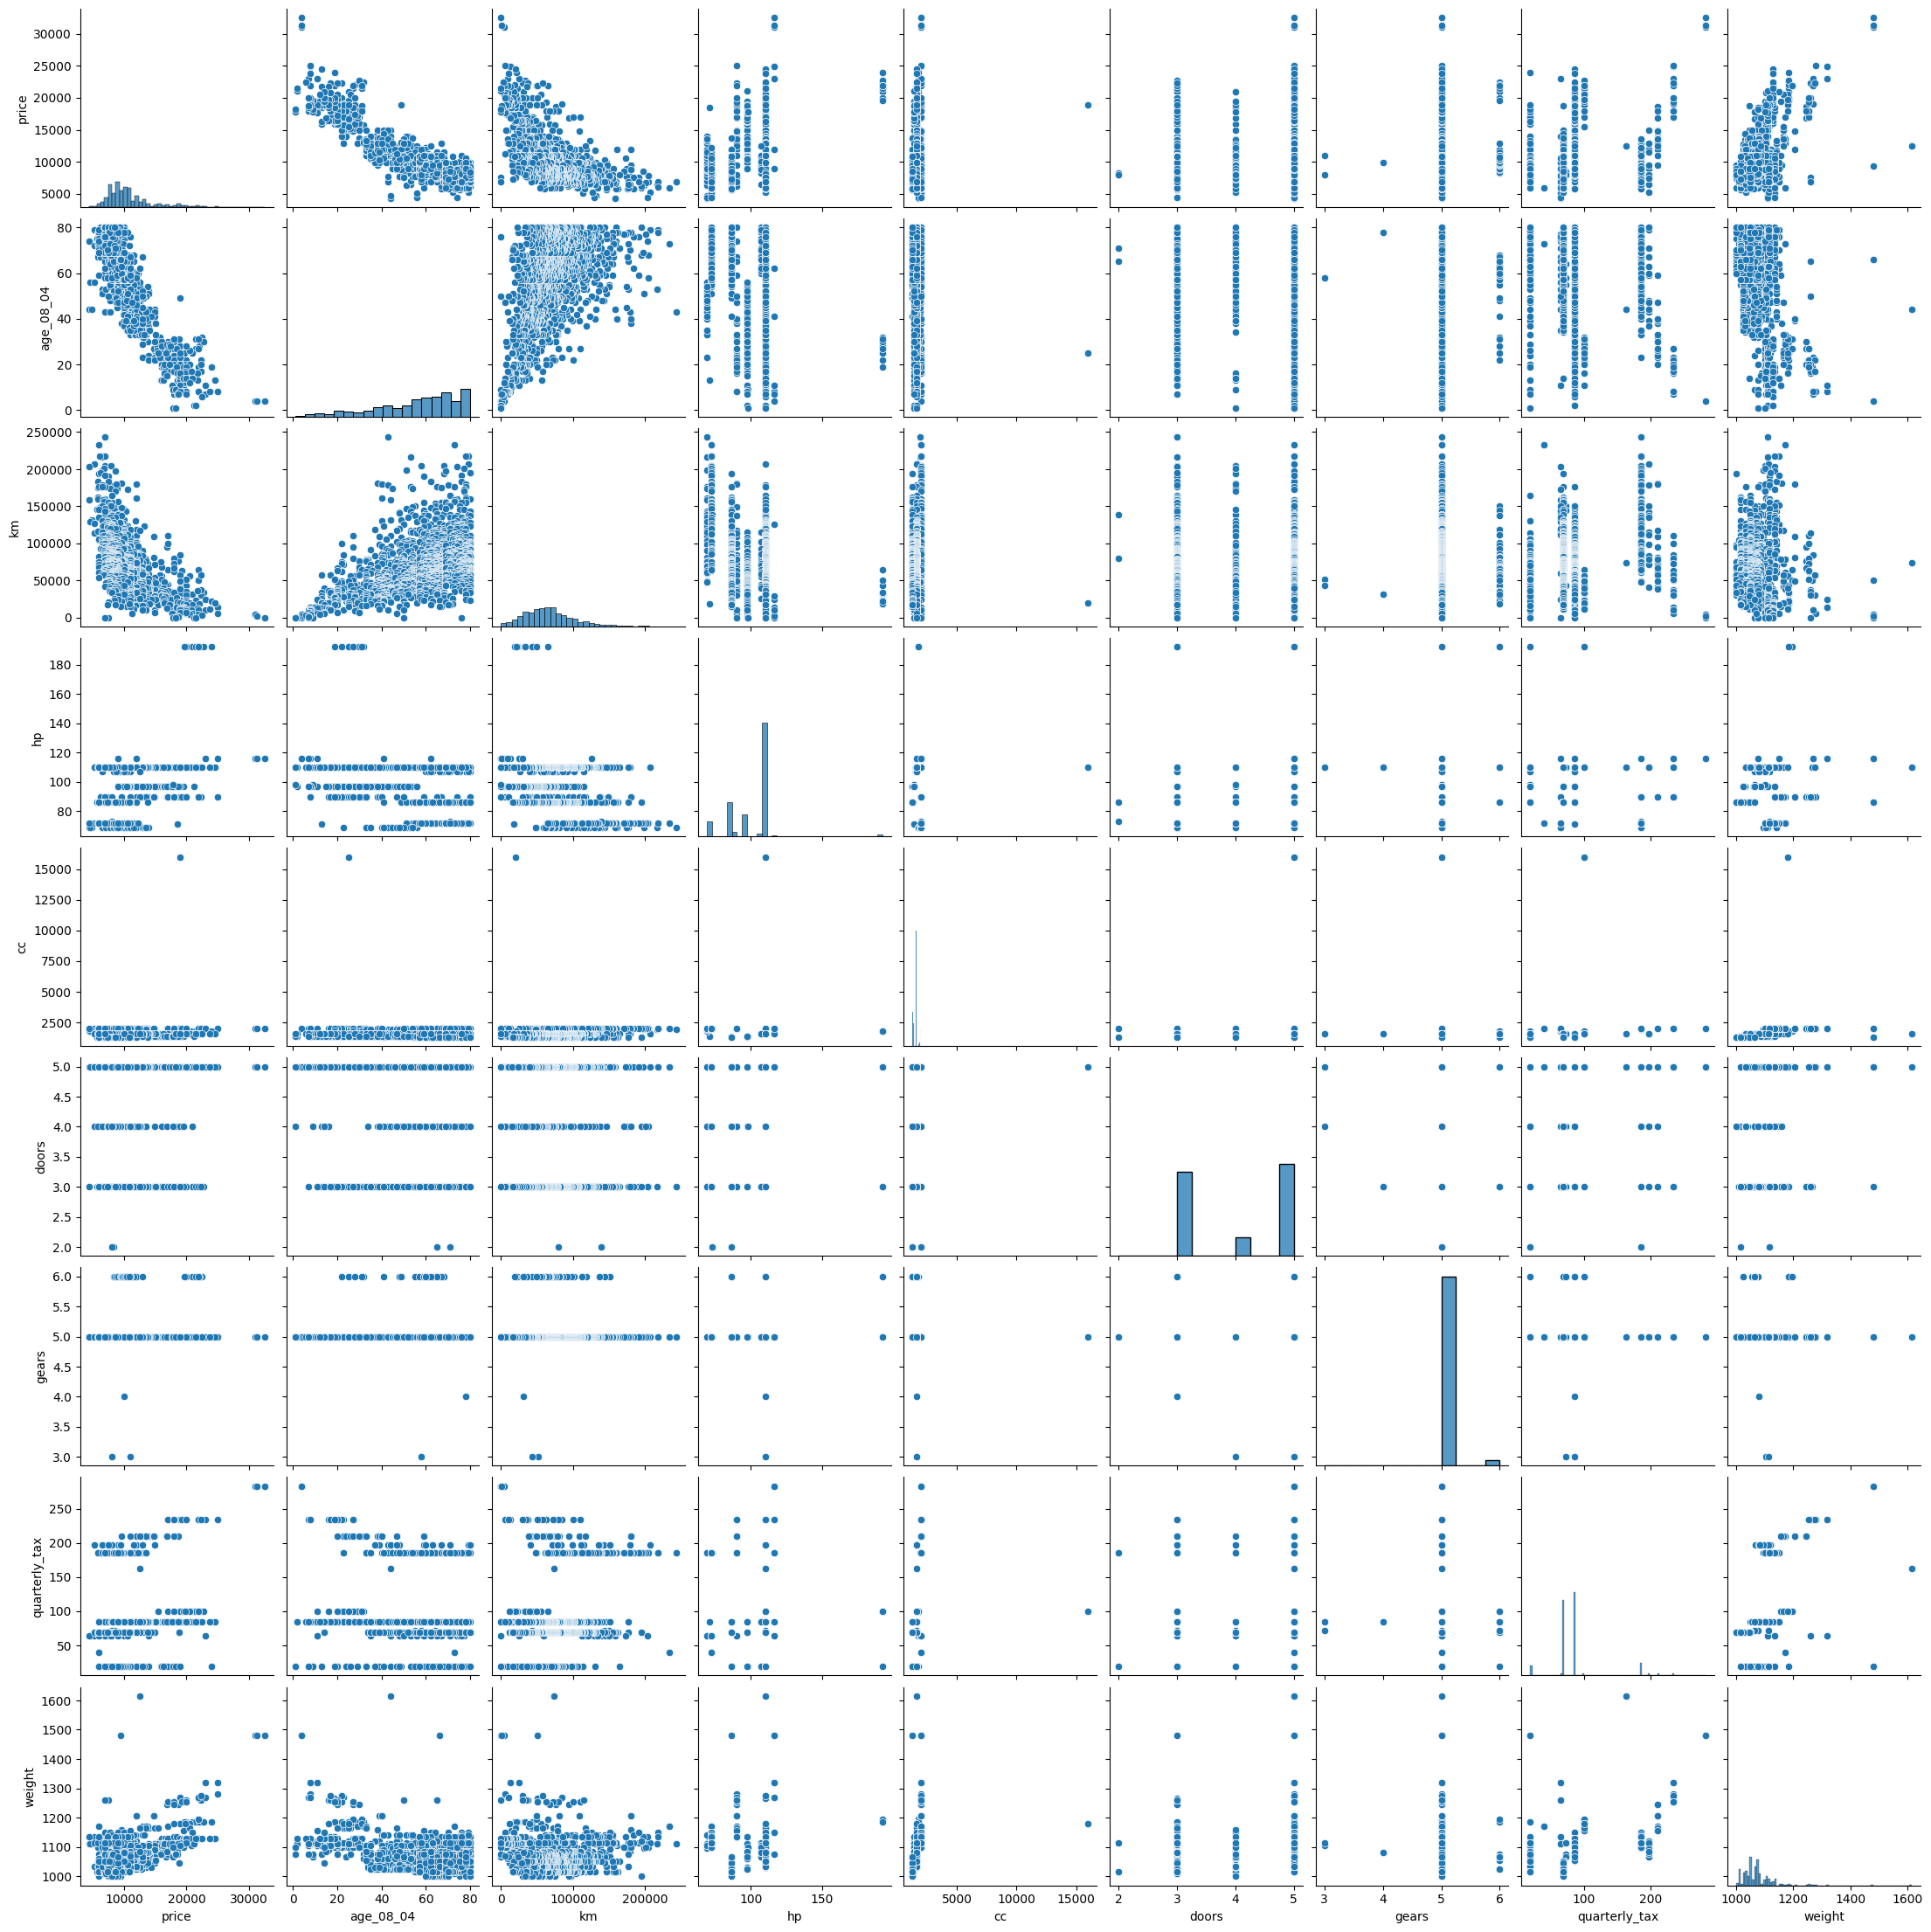

In [15]:
sns.pairplot(df2)

In [16]:
model=smf.ols('price~age_08_04+km+hp+cc+doors+gears+quarterly_tax+weight',data=df2).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:31:09   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
km               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
hp               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
gears           594.3199    197.055      3.016      0.003     207.771     980.869
quarterly_tax     3.9491      1.310      3.015      0.003       1.379       6.519
weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
model.pvalues

Intercept         8.241949e-05
age_08_04        3.354724e-288
km                7.538439e-57
hp                3.757218e-28
cc                1.790902e-01
doors             9.677716e-01
gears             2.606549e-03
quarterly_tax     2.619148e-03
weight            2.048576e-52
dtype: float64

In [19]:
# Calculating VIF Values
rsq_age=smf.ols('age_08_04~km+hp+cc+doors+gears+quarterly_tax+weight',data=df2).fit().rsquared
vif_age=1/(1-rsq_age)

In [20]:
rsq_km=smf.ols('km~age_08_04+hp+cc+doors+gears+quarterly_tax+weight',data=df2).fit().rsquared
vif_km=1/(1-rsq_km)

In [22]:
rsq_hp=smf.ols('hp~age_08_04+km+cc+doors+gears+quarterly_tax+weight',data=df2).fit().rsquared
vif_hp=1/(1-rsq_hp)

In [23]:
rsq_cc=smf.ols('cc~age_08_04+km+hp+doors+gears+quarterly_tax+weight',data=df2).fit().rsquared
vif_cc=1/(1-rsq_cc)

In [26]:
rsq_doors=smf.ols('doors~age_08_04+hp+cc+gears+km+quarterly_tax+weight',data=df2).fit().rsquared
vif_doors=1/(1-rsq_doors)

In [27]:
rsq_gears=smf.ols('gears~age_08_04+hp+cc+doors+km+quarterly_tax+weight',data=df2).fit().rsquared
vif_gears=1/(1-rsq_gears)

In [29]:
rsq_tax=smf.ols('quarterly_tax~age_08_04+hp+cc+doors+gears+km+weight',data=df2).fit().rsquared
vif_tax=1/(1-rsq_tax)

In [31]:
rsq_weight=smf.ols('weight~age_08_04+hp+cc+doors+gears+quarterly_tax+km',data=df2).fit().rsquared
vif_weight=1/(1-rsq_weight)

In [32]:
d1={'variables':['age','km','hp','cc','doors','gears','tax','weight'],
    'vif_values':[vif_age,vif_km,vif_cc,vif_hp,vif_doors,vif_gears,vif_tax,vif_weight]}

vif_data=pd.DataFrame(d1)
vif_data

,variables,vif_values
0,age,1.884620
1,km,1.756905
2,hp,1.163894
3,cc,1.419422
4,doors,1.156575
5,gears,1.098723
6,tax,2.311431
7,weight,2.516420


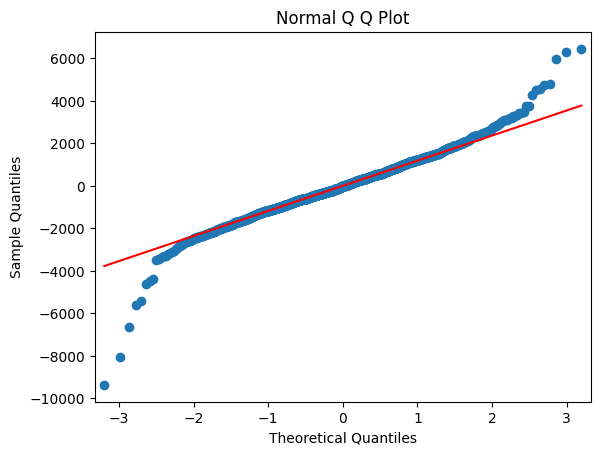

In [33]:
# residual plot
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q Q Plot')
plt.show()

In [34]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058])]

In [36]:
list(np.where(model.resid<-4000))

[array([191, 192, 221, 393, 402, 601, 654, 960])]

In [37]:
def get_standardized_values(val):
  return((val-val.mean())/val.std())

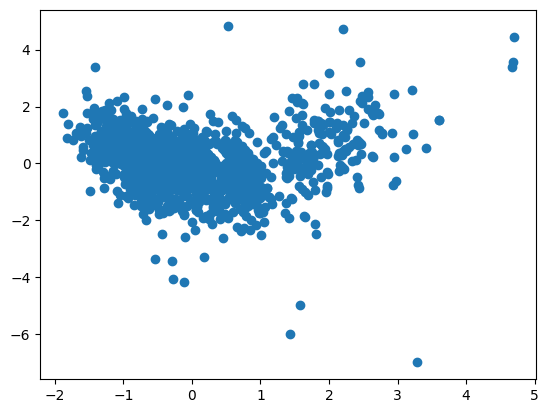

In [38]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

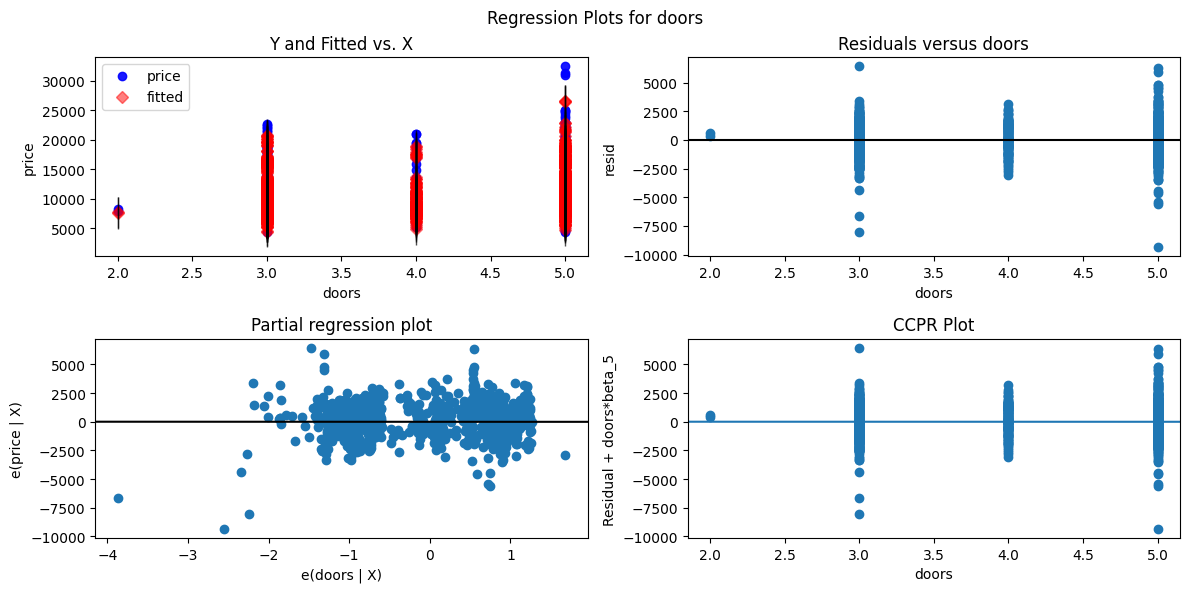

In [41]:
fig=plt.figure(figsize=(12,6))
fig=sm.graphics.plot_regress_exog(model,'doors',fig=fig)
plt.show()

In [40]:
model1_influence=model.get_influence()
(c,_)=model1_influence.cooks_distance

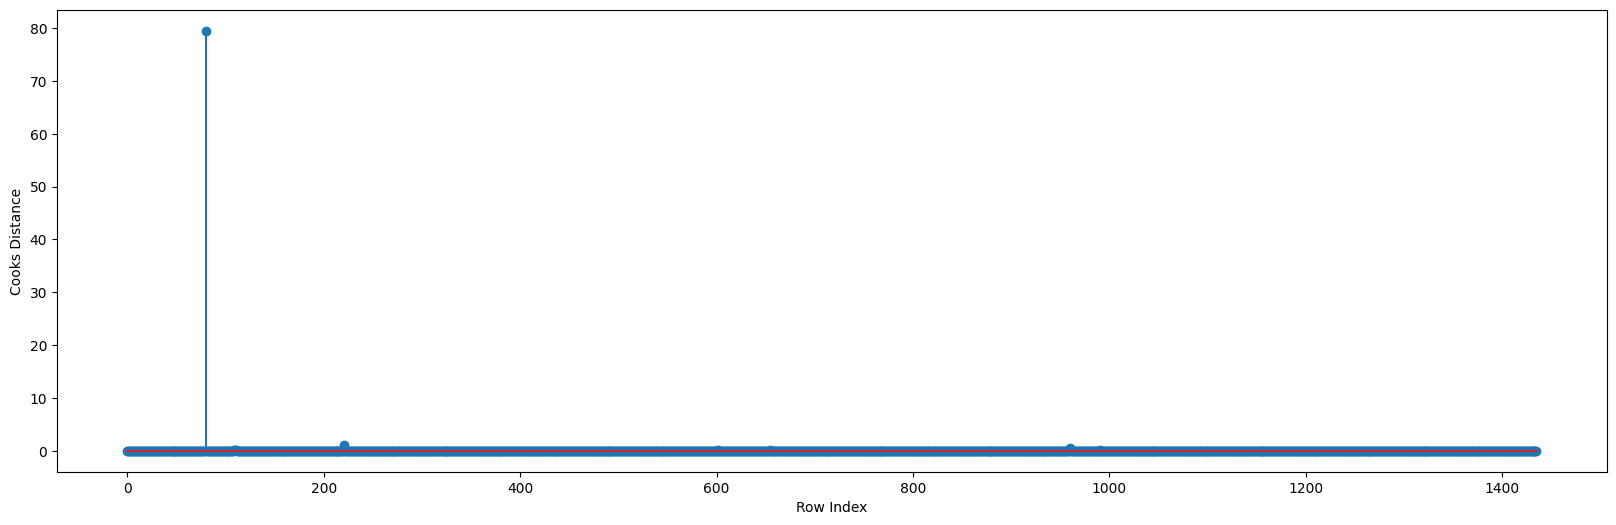

In [42]:
fig=plt.subplots(figsize=(20,6))
plt.stem(np.arange(len(df2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
(np.argmax(c),np.max(c))

(80, 79.52010624141815)

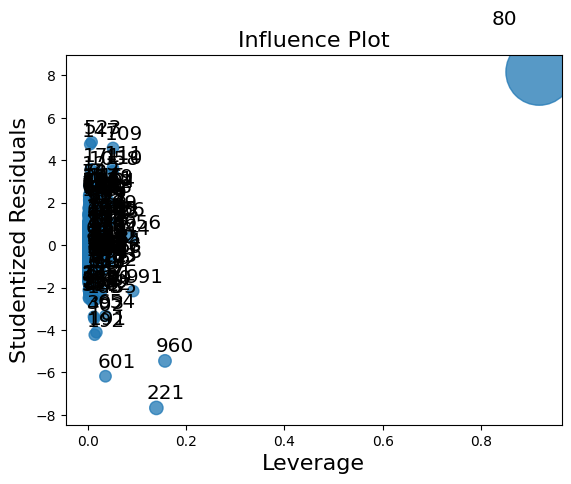

In [44]:
influence_plot(model)
plt.show()

In [45]:
k=df2.shape[1]
n=df2.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.020891364902506964